In [1]:
# importing pandas and numpy
import pandas as pd
import numpy as np
import BillieEyelash as be

# test
print("Hello, world!")
be.hello()

Hello, world!
Hello, world!


In [2]:
# create a random series of numbers with indexes ['a', 'b', 'c', 'd', 'e']
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
# will autoprint bc no other instructions

a    1.423645
b    1.818769
c   -0.892359
d   -2.130410
e   -0.890745
dtype: float64

In [3]:
# create random series and print it
s = pd.Series(np.random.randn(5))
print(s)

0    0.667207
1    0.314840
2   -0.367033
3   -1.413128
4   -0.463895
dtype: float64


In [4]:
# print first item in series
print (s[0])
print("\n")
# print 1st 3 items
print (s[:3])

0.6672069930220377


0    0.667207
1    0.314840
2   -0.367033
dtype: float64


In [5]:
# create data frame
# takes series s and create column named 'Column 1'
df = pd.DataFrame(s, columns = ['Column 1'])
# print df
df

,Column 1
0,0.667207
1,0.314840
2,-0.367033
3,-1.413128
4,-0.463895


In [6]:
# prints column 1
df['Column 1']

0    0.667207
1    0.314840
2   -0.367033
3   -1.413128
4   -0.463895
Name: Column 1, dtype: float64

In [7]:
# create 2nd column that is 4x the first one
df['Column 2'] = df['Column 1'] * 4
df

,Column 1,Column 2
0,0.667207,2.668828
1,0.314840,1.259360
2,-0.367033,-1.468133
3,-1.413128,-5.652513
4,-0.463895,-1.855582


In [8]:
# sorts df by the values in column 2
# preserves indexes
df.sort_values(by = 'Column 2')

,Column 1,Column 2
3,-1.413128,-5.652513
4,-0.463895,-1.855582
2,-0.367033,-1.468133
1,0.314840,1.259360
0,0.667207,2.668828


In [9]:
# boolean indexing
# only prints lines that fulfill the requirement
df[df['Column 2'] <= 2]

,Column 1,Column 2
1,0.314840,1.259360
2,-0.367033,-1.468133
3,-1.413128,-5.652513
4,-0.463895,-1.855582


In [10]:
# not totally sure how this works
# finds the average of the min and max for each column?
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Column 1   -0.252402
Column 2   -1.009608
dtype: float64

In [11]:
# describe basically gives you: count/mean/std/min/25%/50%/75%/max 
table = df.describe()
print(table)

       Column 1  Column 2
count  5.000000  5.000000
mean  -0.252402 -1.009608
std    0.801966  3.207865
min   -1.413128 -5.652513
25%   -0.463895 -1.855582
50%   -0.367033 -1.468133
75%    0.314840  1.259360
max    0.667207  2.668828


In [12]:
# import matplotlib
import matplotlib.pyplot as plt
# Put the graphs inline (seems to already be the case)
# %matplotlib inline
# choses the style
plt.style.use('ggplot')

In [13]:
# reads a csv file
df = pd.read_csv(r"GlobalTemperatures.csv")

In [14]:
# print first 2 lines
print(df.head(2))
# print last 2 lines
print(df.tail(2))
# if the number of lines is not specified, it autosets to 5

           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
             dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3190  11/1/2015                   7.433                              0.119   
3191  12/1/2015                   5.518 

In [15]:
df = df.iloc[:,:2]
print(df.head(1))

           dt  LandAverageTemperature
0  1750-01-01                   3.034


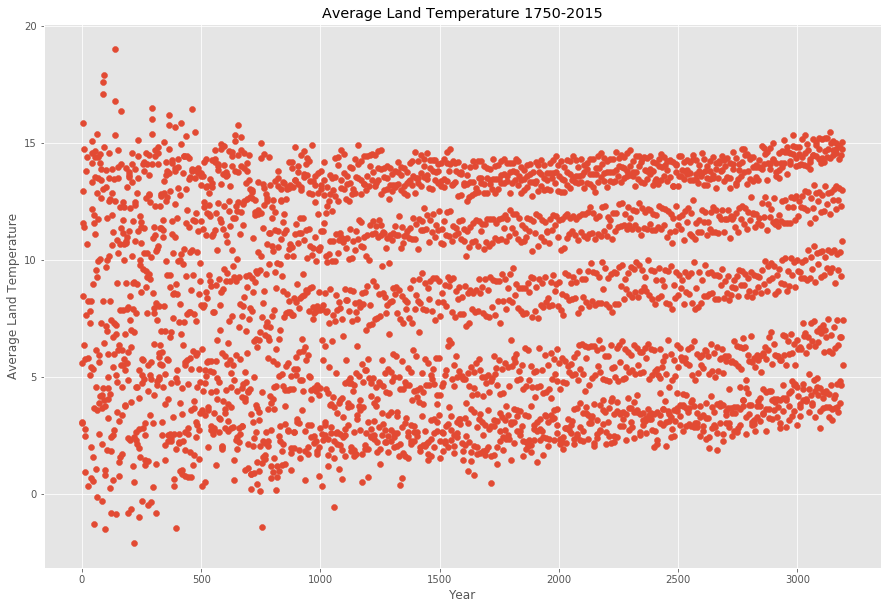

In [16]:
# Cursory plot using data for average land temp (don't run bc no data here)
plt.figure(figsize = (15, 10))
# make scatter plot with all data
# x is index and y is temp
plt.scatter(x = df['LandAverageTemperature'].index, y 
    = df['LandAverageTemperature'])
# set title for graph
plt.title("Average Land Temperature 1750-2015")
# label x axis
plt.xlabel("Year")
# label y axis
plt.ylabel("Average Land Temperature")
# show graph
plt.show()

In [17]:
# you can use pandas to convert to datetime object
times = pd.DatetimeIndex(df['dt'])
print(type(df['dt'][0]))
print(type(times[0]))

# now you can use this to group by year and take the mean of the year
print(df.head())
grouped = df.groupby([times.year]).count()
print(grouped.head(20))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
           dt  LandAverageTemperature
0  1750-01-01                   3.034
1  1750-02-01                   3.083
2  1750-03-01                   5.626
3  1750-04-01                   8.490
4  1750-05-01                  11.573
      dt  LandAverageTemperature
dt                              
1750  12                      11
1751  12                       7
1752  12                       6
1753  12                      12
1754  12                      12
1755  12                      12
1756  12                      12
1757  12                      12
1758  12                      12
1759  12                      12
1760  12                      12
1761  12                      12
1762  12                      12
1763  12                      12
1764  12                      12
1765  12                      12
1766  12                      12
1767  12                      12
1768  12                      12
1769  12      

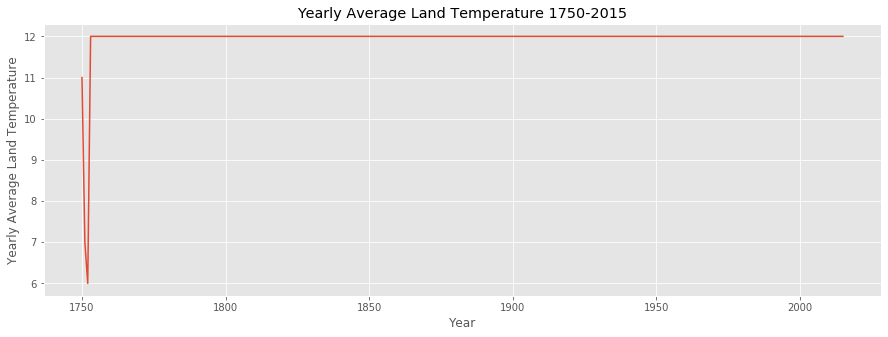

In [18]:
# now use this to plot the data
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
# Change features of the graph
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [19]:
# there are some anomalies in the graph -- 
# they are caused by gaps in data and lack of information
grouped.head()
df[times.year == 1752]
# there are a lot of null values

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


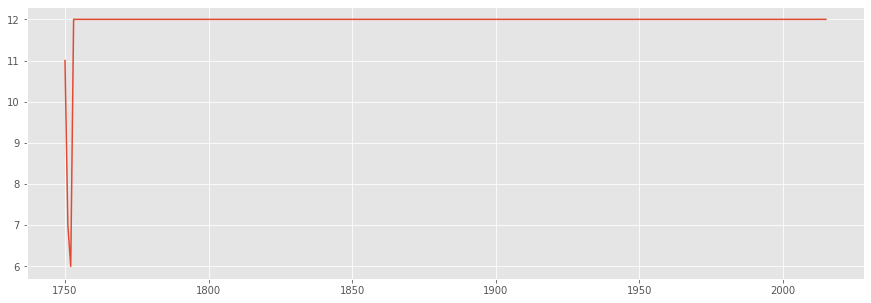

In [20]:
# a way to full in NaN values
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

In [21]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
   ...:                    ('bird', 'Psittaciformes', 24.0),
   ...:                    ('mammal', 'Carnivora', 80.2),
   ...:                    ('mammal', 'Primates', np.nan),
   ...:                    ('mammal', 'Carnivora', 58)],
   ...:                   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
   ...:                   columns=('class', 'order', 'max_speed'))

df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [22]:
print(df.groupby('class'))


In [23]:
grouped = df.groupby('order', axis='columns')

grouped

In [24]:
grouped = df.groupby(['class', 'order'])

grouped